# Stochastic and Batch Gradient Descent for Percetron from Scratch

## Building the objects we need : Module (=perceptron) , Loss

In [2]:
import numpy as np
import random

class Module:
    def forward(self,x):
        pass
    def backward_updateGradient(self,x,delta):
        pass
    def zeroGradParameters(self):
        pass

    
class Loss:
    def getLossValue(self, ypredit ,y):
        pass
    def backward(self,ypredit,y):
        pass
    
        
        
class TanHModule(Module):
    def __init__(self,dimension):
        self.X = dimension
    
    def forward(self,x):
        result[i] = np.tanh(x[i])
        return result
    
    
class SquareLoss(Loss) :
    def __init__(self,dimension):
        self.dimension=dimension
        
    def getLossValue (self, y_predit,y):
        loss = 0.0
        for k in range(0,self.dimension) :
            loss += (y_predit[k]-y[k])**2
        loss /= self.dimension
        return loss
    
    def backward(self,y_predit, y):
        grad = np.zeros(self.dimension)
        for k in range(0,self.dimension):
            grad[k] = 2/self.dimension*(y_predit[k]-y[k])
        return grad
    
    
class LinearModule(Module):
    def __init__(self,n,C):
        self.X = n #input_dimension
        self.Y = C #ouput_dimension
        self.theta = np.zeros((self.X,self.Y))
        self.grad = np.zeros((self.X,self.Y))
        
    def zeroGradParameters(self):
        self.grad = np.zeros((self.X,self.Y))

    def forward(self,x):
        result = np.dot(x,self.theta)
        return result
    
    def randomize(self, variance):
        for i in range(0,self.X):
            for j in range(0,self.Y):
                self.theta[i][j]= random.uniform(-variance,variance)
        
    def backward_updateGradient(self,x,delta):
        #delta = R^C
        #Grad_\theta(loss(f_theta(x),y) \in R^{C \times n}
        for i in range(0,self.X):
            for j in range(0,self.Y):
                self.grad[i][j] += delta[j]*x[i]
        #return self.grad
    
    def updateParameters(self,learning_rate):
        self.theta = self.theta - learning_rate*self.grad

## Getting the data

In [3]:
from sklearn.cross_validation import KFold, train_test_split

def load_mnist(filename):
    with open(filename,"r") as f:
        f.readline()
        data =[ [float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp = np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

data = load_mnist('../USPS_train.txt')
data_real = np.concatenate((np.asmatrix(data[0]),np.transpose(np.asmatrix(data[1]))),axis=1)

x_train, x_test, y_train_0, y_test_0 = train_test_split(np.asarray(data_real[:,0:256]),np.asarray(data_real[:,256])
                                                    , test_size=0.33,random_state=42)


y_train =(-1)*np.zeros((len(x_train),10))
for i in range(0,len(x_train)):
    p= int(y_train_0[i])
    y_train[i][p]=1

y_test =(-1)*np.zeros((len(x_test),10))
for i in range(0,len(x_test)):
    p= int(y_test_0[i])
    y_test[i][p]=1

## Creating the objects and defining the parameters

In [60]:
model = LinearModule(256,10)
model.randomize(0.1)
criterion = SquareLoss(10)
learning_rate= 0.01 
maxEpoch = 200 

all_losses= np.zeros(maxEpoch)
all_losses_global_train=np.zeros(maxEpoch)
all_losses_global_test=np.zeros(maxEpoch)
all_out =np.zeros(maxEpoch)
accuracy_train=np.zeros(maxEpoch)
accuracy_test=np.zeros(maxEpoch)

## Stochastic Gradient Descent

In [61]:
import time
time_started = time.time()

for iteration in range(0,maxEpoch): 
    j=random.randint(0,len(x_train)-1)
    model.zeroGradParameters()
    x=x_train[j]
    y=y_train[j]
    out = model.forward(x) #value with module
    loss=criterion.getLossValue(out,y) #loss between y-predicted et y
    delta=criterion.backward(out,y) #first part of the gradient
    model.backward_updateGradient(x,delta) #gradient is calculated
    all_losses[iteration]=loss #Loss
    model.updateParameters(learning_rate) #update 
    
    
    ##Measuring Loss and Accuracy on test and train sets.
    all_losses_global_test[iteration] = 0
    for k in range(0,len(x_test)):
        all_losses_global_test[iteration] += criterion.getLossValue(model.forward(x_test[k]),y_test[k])/len(x_test)
    
    all_losses_global_train[iteration] = 0
    for k in range(0,len(x_train)):
        all_losses_global_train[iteration] += criterion.getLossValue(model.forward(x_train[k]),y_train[k])/len(x_train)
    
    accuracy_train[iteration] = 0
    for k in range(0,len(x_train)):
        accuracy_train[iteration] += (np.argmax(model.forward(x_train[k]))==np.argmax(y_train[k]))*1/len(x_train)
         
    accuracy_test[iteration] = 0
    for k in range(0,len(x_test)):
        accuracy_test[iteration] += (np.argmax(model.forward(x_test[k]))==np.argmax(y_test[k]))*1/len(x_test)
    
time_finished = time.time()   

## Results for Stochastic gradient descent  

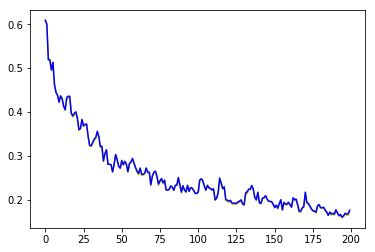

In [62]:
#Losses
import matplotlib.pyplot as plt
plt.plot(all_losses_global_train,'y')
plt.plot(all_losses_global_test,'b')
plt.show()

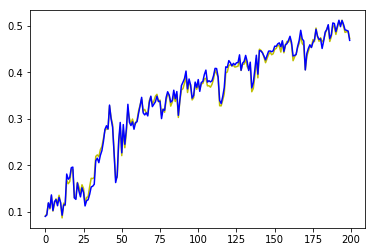

In [63]:
#Accuracy
plt.plot(accuracy_train,'y')
plt.plot(accuracy_test,'b')
plt.show()

In [64]:
#Time taken 
print(f'The Stochastic Gradient Descent took {time_finished-time_started:.2f} seconds')
print(f'Last Accuracy on train/test were {accuracy_train[-1]*100:.2f}% / {accuracy_test[-1]*100:.2f}% ')
print(f'Last Loss on train/test were {all_losses_global_train[-1]*100:.2f} / {all_losses_global_test[-1]*100:.2f} ')

The Stochastic Gradient Descent took 26.81 seconds
Last Accuracy on train/test were 47.30% / 46.86% 
Last Loss on train/test were 17.34 / 17.61 


## Batch Gradient Descent

In [74]:
model = LinearModule(256,10)
model.randomize(0.1)
criterion = SquareLoss(10)
learning_rate= 0.01 
maxEpoch = 5 

all_losses_global_train_batch=np.zeros(maxEpoch)
all_losses_global_test_batch=np.zeros(maxEpoch)
accuracy_train_batch=np.zeros(maxEpoch)
accuracy_test_batch=np.zeros(maxEpoch)

In [75]:
time_started = time.time()
for iteration in range(0,maxEpoch) :
    model.zeroGradParameters()
    loss=0
    for j in range(0,len(x_train)):
        x=x_train[j]
        y=y_train[j]
        out = model.forward(x) #valeur avec le modele
        loss += criterion.getLossValue(out,y) #cout entre y_prédit et y
        delta = criterion.backward(out,y)
        model.backward_updateGradient(x,delta/len(x_train))
    all_losses_global_train_batch[iteration]= loss/len(x_train)
    
    all_losses_global_test_batch[iteration] = 0
    for k in range(0,len(x_test)):
        all_losses_global_test_batch[iteration] += criterion.getLossValue(model.forward(x_test[k]),y_test[k])/len(x_test)
    
    all_losses_global_train_batch[iteration] = 0
    for k in range(0,len(x_train)):
        all_losses_global_train_batch[iteration] += criterion.getLossValue(model.forward(x_train[k]),y_train[k])/len(x_train)
    
    accuracy_train_batch[iteration] = 0
    for k in range(0,len(x_train)):
        accuracy_train_batch[iteration] += (np.argmax(model.forward(x_train[k]))==np.argmax(y_train[k]))*1/len(x_train)
         
    accuracy_test_batch[iteration] = 0
    for k in range(0,len(x_test)):
        accuracy_test_batch[iteration] += (np.argmax(model.forward(x_test[k]))==np.argmax(y_test[k]))*1/len(x_test)

    model.updateParameters(learning_rate) 

time_finished = time.time()

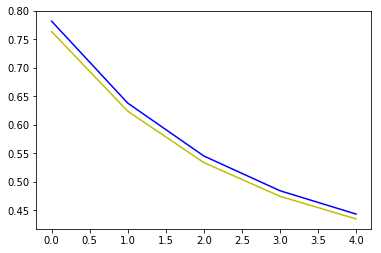

In [76]:
import matplotlib.pyplot as plt
plt.plot(all_losses_global_train_batch,'y')
plt.plot(all_losses_global_test_batch,'b')
plt.show()

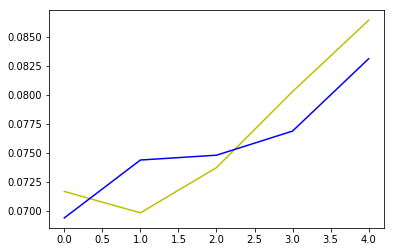

In [77]:
#Accuracy
plt.plot(accuracy_train_batch,'y')
plt.plot(accuracy_test_batch,'b')
plt.show()

In [78]:
#Time taken 
print(f'The Stochastic Gradient Descent took {time_finished-time_started:.2f} seconds')
print(f'Last Accuracy on train/test were {accuracy_train_batch[-1]*100:.2f}% / {accuracy_test_batch[-1]*100:.2f}% ')
print(f'Last Loss on train/test were {all_losses_global_train_batch[-1]*100:.2f} / {all_losses_global_test_batch[-1]*100:.2f} ')

The Stochastic Gradient Descent took 47.92 seconds
Last Accuracy on train/test were 8.64% / 8.31% 
Last Loss on train/test were 43.48 / 44.33 
